In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [3]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [5]:
import math
from random import randint

In [6]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 10


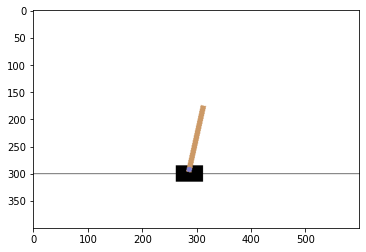

In [7]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

# SARSA

In [28]:
class SARAS():
  def __init__(self):
    self.q = np.zeros((1,1,10,20,2))
    self.p = np.random.randint(2,size=(1,1,10,20))
    self.maxstep = 200
    self.min_lr = 0.1
    self.min_e = 0.1
    self.gamma = 1
    self.upper_bound = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    self.lower_bound = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    self.cluster = [1,1,10,20]
    self.history = []

  def get_state(self,obs):
    ratio = [(obs[i] - self.lower_bound[i]) / (self.upper_bound[i] - self.lower_bound[i]) for i in range(len(obs))]
    state = [int(round((self.cluster[i] - 1)*ratio[i])) for i in range(len(obs))]
    state = [min(self.cluster[i] - 1, max(0, state[i])) for i in range(len(obs))]
    return state

  def Decay(self, episodas):
    return max(self.min_e, min(1, 1.0 - math.log10((episodas + 1) / 25))), max(self.min_lr, min(1, 1.0 - math.log10((episodas + 1) / 25)))

  def e_greedy(self, state, e):
    if np.random.random() < e:
      action = env.action_space.sample()
    else:
      action = self.p[state]
    return action

  def update(self,s,a,s1,a1,r,lr):
    self.q[s][a] += lr * (r + self.gamma * self.q[s1][a1] - self.q[s][a])

  def act(self, state):
    return self.p[state]

  def policy_inprovement(self):
    for i in range(1):
      for j in range(1):
        for k in range(10):
          for v in range(20):
            self.p[i,j,k,v] = np.argmax(self.q[i,j,k,v])

In [30]:
n_episodes = 5000
agent = SARAS()
for episodas in range(n_episodes):
  obs = env.reset()
  e, lr = agent.Decay(episodas=episodas)
  s = tuple(agent.get_state(obs))
  a = agent.e_greedy(s,e)
  for iter in range(agent.maxstep):
    obs, r, done, _ = env.step(a)
    s1 = tuple(agent.get_state(obs))
    a1 = agent.e_greedy(s1,e)
    agent.update(s,a,s1,a1,r,lr)
    if done:
      agent.history.append(iter)
      agent.policy_inprovement()
      print("Episoda: {} | Last {} step".format(episodas,iter))
      break
    s,a = s1,a1

流式输出内容被截断，只能显示最后 5000 行内容。
Episoda: 0 | Last 13 step
Episoda: 1 | Last 19 step
Episoda: 2 | Last 40 step
Episoda: 3 | Last 9 step
Episoda: 4 | Last 9 step
Episoda: 5 | Last 29 step
Episoda: 6 | Last 26 step
Episoda: 7 | Last 15 step
Episoda: 8 | Last 23 step
Episoda: 9 | Last 16 step
Episoda: 10 | Last 21 step
Episoda: 11 | Last 12 step
Episoda: 12 | Last 8 step
Episoda: 13 | Last 32 step
Episoda: 14 | Last 19 step
Episoda: 15 | Last 10 step
Episoda: 16 | Last 26 step
Episoda: 17 | Last 18 step
Episoda: 18 | Last 14 step
Episoda: 19 | Last 20 step
Episoda: 20 | Last 9 step
Episoda: 21 | Last 25 step
Episoda: 22 | Last 19 step
Episoda: 23 | Last 9 step
Episoda: 24 | Last 20 step
Episoda: 25 | Last 43 step
Episoda: 26 | Last 38 step
Episoda: 27 | Last 13 step
Episoda: 28 | Last 13 step
Episoda: 29 | Last 51 step
Episoda: 30 | Last 18 step
Episoda: 31 | Last 12 step
Episoda: 32 | Last 53 step
Episoda: 33 | Last 10 step
Episoda: 34 | Last 11 step
Episoda: 35 | Last 10 step
Episoda: 36 | La

Iterations that were run: 199


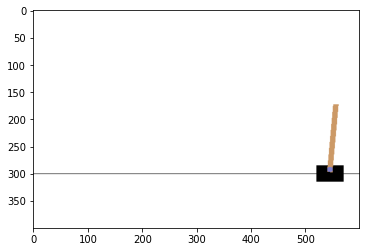

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
obs = env.reset()
for i in range(50000):
  state = tuple(agent.get_state(obs))
  action = agent.act(state)
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

# Qlearn

In [ ]:
class Qlearn():
  def __init__(self):
    self.q = np.zeros((1,1,10,20,2))
    self.maxstep = 200
    self.min_lr = 0.1
    self.min_e = 0.1
    self.gamma = 1
    self.upper_bound = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    self.lower_bound = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    self.cluster = [1,1,10,20]
    self.history = []

  def get_state(self,obs):
    ratio = [(obs[i] - self.lower_bound[i]) / (self.upper_bound[i] - self.lower_bound[i]) for i in range(len(obs))]
    state = [int(round((self.cluster[i] - 1)*ratio[i])) for i in range(len(obs))]
    state = [min(self.cluster[i] - 1, max(0, state[i])) for i in range(len(obs))]
    return state

  def Decay(self, episodas):
    return max(self.min_e, min(1, 1.0 - math.log10((episodas + 1) / 25))), max(self.min_lr, min(1, 1.0 - math.log10((episodas + 1) / 25)))

  def e_greedy(self, state, e):
    if np.random.random() < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(self.q[state])
    return action

  def update(self,s,a,s1,r,lr):
    self.q[s][a] += lr * (r + self.gamma * np.max(self.q[s1]) - self.q[s][a])

  def act(self, state):
    return np.argmax(self.q[state])


In [ ]:
n_episodes = 1000
agent = Qlearn()
for episodas in range(n_episodes):
  obs = env.reset()
  e, lr = agent.Decay(episodas=episodas)
  for iter in range(agent.maxstep):
    s = tuple(agent.get_state(obs))
    a = agent.e_greedy(s,e)
    obs, r, done, _ = env.step(a)
    s1 = tuple(agent.get_state(obs))
    agent.update(s,a,s1,r,lr)
    if done:
      agent.history.append(iter)
      print("Episoda: {} | Last {} step".format(episodas,iter))
      break





Episoda: 0 | Last 29 step
Episoda: 1 | Last 15 step
Episoda: 2 | Last 22 step
Episoda: 3 | Last 16 step
Episoda: 4 | Last 14 step
Episoda: 5 | Last 11 step
Episoda: 6 | Last 13 step
Episoda: 7 | Last 14 step
Episoda: 8 | Last 21 step
Episoda: 9 | Last 16 step
Episoda: 10 | Last 9 step
Episoda: 11 | Last 10 step
Episoda: 12 | Last 20 step
Episoda: 13 | Last 29 step
Episoda: 14 | Last 30 step
Episoda: 15 | Last 24 step
Episoda: 16 | Last 10 step
Episoda: 17 | Last 37 step
Episoda: 18 | Last 9 step
Episoda: 19 | Last 26 step
Episoda: 20 | Last 28 step
Episoda: 21 | Last 13 step
Episoda: 22 | Last 33 step
Episoda: 23 | Last 24 step
Episoda: 24 | Last 10 step
Episoda: 25 | Last 15 step
Episoda: 26 | Last 15 step
Episoda: 27 | Last 31 step
Episoda: 28 | Last 22 step
Episoda: 29 | Last 19 step
Episoda: 30 | Last 18 step
Episoda: 31 | Last 11 step
Episoda: 32 | Last 16 step
Episoda: 33 | Last 40 step
Episoda: 34 | Last 15 step
Episoda: 35 | Last 9 step
Episoda: 36 | Last 63 step
Episoda: 37 | 

# Expected Sarsa

In [24]:
class E_SARSA():
  def __init__(self):
    self.q = np.zeros((1,1,10,20,2))
    self.p = np.random.randint(2,size=(1,1,10,20))
    self.maxstep = 200
    self.min_lr = 0.1
    self.min_e = 0.1
    self.gamma = 1
    self.upper_bound = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    self.lower_bound = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    self.cluster = [1,1,10,20]
    self.history = []

  def get_state(self,obs):
    ratio = [(obs[i] - self.lower_bound[i]) / (self.upper_bound[i] - self.lower_bound[i]) for i in range(len(obs))]
    state = [int(round((self.cluster[i] - 1)*ratio[i])) for i in range(len(obs))]
    state = [min(self.cluster[i] - 1, max(0, state[i])) for i in range(len(obs))]
    return state

  def Decay(self, episodas):
    return max(self.min_e, min(1, 1.0 - math.log10((episodas + 1) / 25))), max(self.min_lr, min(1, 1.0 - math.log10((episodas + 1) / 25)))

  def e_greedy(self, state, e):
    if np.random.random() < e:
      action = env.action_space.sample()      
    else:
      action = self.p[state]
    if action == self.p[state]:
      prob = (1-e) + e/2
    else:
      prob = e/2  
    return action, prob

  def update(self,s,a,s1,a1,r,lr,prob):
    self.q[s][a] += lr * (r + self.gamma *(prob*self.q[s1][a1]+(1-prob)*self.q[s1][1-a1]) - self.q[s][a])

  def act(self, state):
    return self.p[state]

  def policy_inprovement(self):
    for i in range(1):
      for j in range(1):
        for k in range(10):
          for v in range(20):
            self.p[i,j,k,v] = np.argmax(self.q[i,j,k,v])

In [34]:
n_episodes = 5000
agent = E_SARSA()
for episodas in range(n_episodes):
  obs = env.reset()
  e, lr = agent.Decay(episodas=episodas)
  s = tuple(agent.get_state(obs))
  a,prob = agent.e_greedy(s,e)
  for iter in range(agent.maxstep):
    obs, r, done, _ = env.step(a)
    s1 = tuple(agent.get_state(obs))
    a1,prob = agent.e_greedy(s1,e)
    agent.update(s,a,s1,a1,r,lr,prob)
    if done:
      agent.history.append(iter)
      agent.policy_inprovement()
      print("Episoda: {} | Last {} step".format(episodas,iter))
      break
    s,a = s1,a1

流式输出内容被截断，只能显示最后 5000 行内容。
Episoda: 0 | Last 45 step
Episoda: 1 | Last 21 step
Episoda: 2 | Last 13 step
Episoda: 3 | Last 52 step
Episoda: 4 | Last 11 step
Episoda: 5 | Last 20 step
Episoda: 6 | Last 14 step
Episoda: 7 | Last 12 step
Episoda: 8 | Last 14 step
Episoda: 9 | Last 74 step
Episoda: 10 | Last 9 step
Episoda: 11 | Last 52 step
Episoda: 12 | Last 12 step
Episoda: 13 | Last 42 step
Episoda: 14 | Last 13 step
Episoda: 15 | Last 31 step
Episoda: 16 | Last 19 step
Episoda: 17 | Last 33 step
Episoda: 18 | Last 20 step
Episoda: 19 | Last 36 step
Episoda: 20 | Last 25 step
Episoda: 21 | Last 15 step
Episoda: 22 | Last 10 step
Episoda: 23 | Last 30 step
Episoda: 24 | Last 59 step
Episoda: 25 | Last 11 step
Episoda: 26 | Last 25 step
Episoda: 27 | Last 22 step
Episoda: 28 | Last 18 step
Episoda: 29 | Last 19 step
Episoda: 30 | Last 21 step
Episoda: 31 | Last 12 step
Episoda: 32 | Last 24 step
Episoda: 33 | Last 10 step
Episoda: 34 | Last 28 step
Episoda: 35 | Last 23 step
Episoda: 36 

Iterations that were run: 165


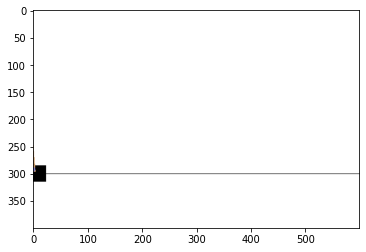

In [36]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
obs = env.reset()
for i in range(50000):
  state = tuple(agent.get_state(obs))
  action = agent.act(state)
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)